### IMport library

In [105]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import warnings

In [106]:
warnings.filterwarnings("ignore")

In [107]:
df = pd.read_csv('income_evaluation.csv')

### EDA

In [108]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

In [109]:
df.columns = col_names

In [110]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [111]:
df.drop('fnlwgt', axis = 1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [112]:
bins = [16,24,64,90]
labels = ['young', 'abult', 'old']
df['age_type'] = pd.cut(df['age'], bins = bins, labels = labels)
df['income_num'] = np.where(df['income'] == '>50k', 1, 0).astype('int16')

In [113]:
np.unique(df.education)

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [114]:
strip_columns = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex',
       'native-country','income']

In [115]:
for i in strip_columns:
    df[i] = df[i].str.strip()

In [116]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_type,income_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,abult,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,abult,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,abult,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,abult,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,abult,0


In [117]:
np.unique(df.education)

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [118]:
np.unique(df.workclass)

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [119]:
# Identifying categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'O']
print("There are {} categorical variables\n".format(len(categorical)))
print(categorical)

There are 9 categorical variables

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [120]:
# Identifying numerical variables
numerical = [var for var in df.columns if df[var].dtype == 'int64']
print("There are {} numerical variables\n".format(len(numerical)))
print(numerical)

There are 6 numerical variables

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [121]:
df.loc[df['workclass'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_type,income_num
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,abult,0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,abult,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,abult,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,old,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,abult,0
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,abult,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,old,0
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,abult,0


In [122]:
df.loc[df['workclass'] == '?', 'workclass'] = np.NaN
df.loc[df['occupation'] == '?', 'occupation'] = np.NaN
df.loc[df['native-country'] == '?', 'native-country'] = np.NaN

In [123]:
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [124]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
age_type             0
income_num           0
dtype: int64

### label Encoding

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

In [127]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_type', 'income_num'],
      dtype='object')

In [128]:
label_list = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for i in label_list:
    label_encoder(i)

In [129]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_type,income_num
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,abult,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,abult,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,abult,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,abult,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,abult,0


### Normalizing the variables

In [130]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
scaler = MinMaxScaler()

In [132]:
scaler.fit(df.drop(['income','age_type','income_num','fnlwgt'], axis = 1))

MinMaxScaler()

In [133]:
scaled_features = scaler.transform(df.drop(['income','age_type','income_num','fnlwgt'], axis = 1))

In [134]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_type', 'income_num'],
      dtype='object')

In [135]:
columns = (['age', 'workclass','education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'])

In [136]:
df_scaled = pd.DataFrame(scaled_features, columns = columns)
df_scaled.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,0.750,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.926829
1,0.452055,0.625,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.00000,0.0,0.122449,0.926829
2,0.287671,0.375,0.733333,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.00000,0.0,0.397959,0.926829
3,0.493151,0.375,0.066667,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.00000,0.0,0.397959,0.926829
4,0.150685,0.375,0.600000,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.00000,0.0,0.397959,0.097561


### Handling Imbalance

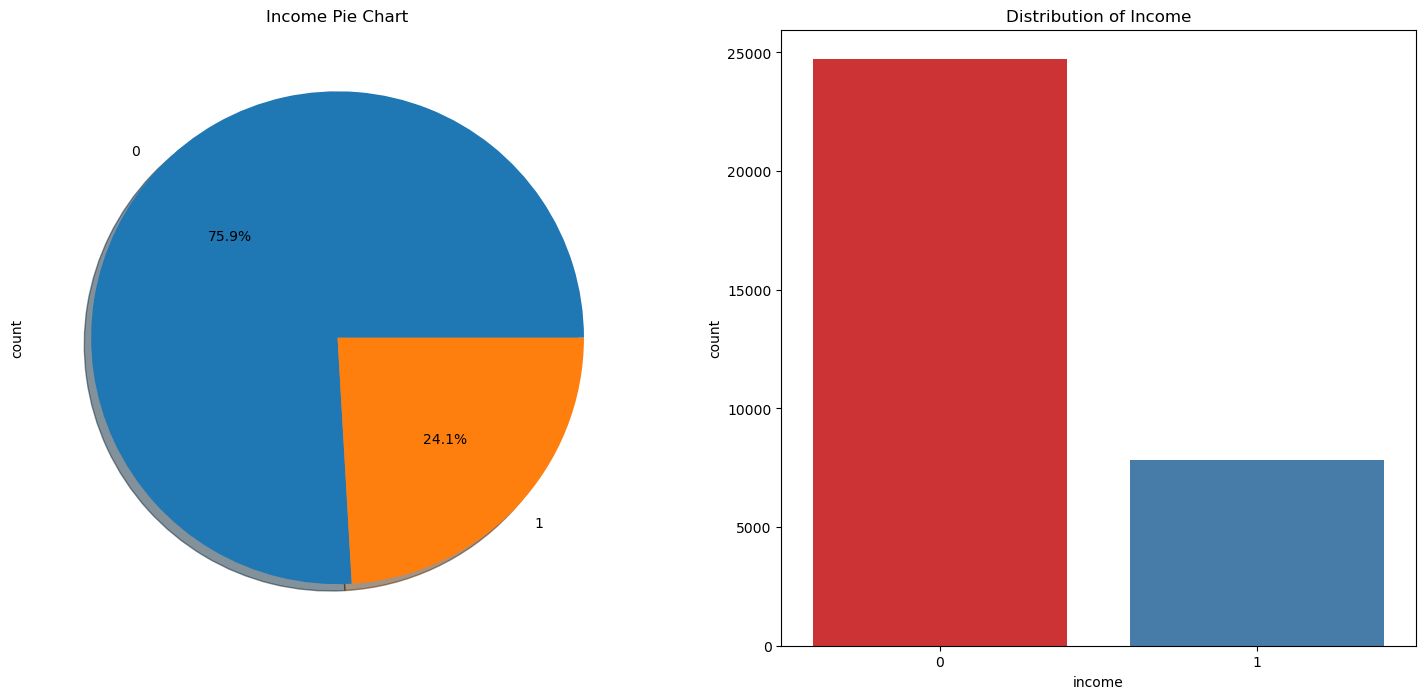

In [137]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for income distribution
ax[0] = df['income'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Income Pie Chart')

# Count plot for income distribution
ax[1] = sns.countplot(x='income', data=df, palette="Set1")
ax[1].set_title('Distribution of Income')

plt.show()


In [138]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [139]:
X = df_scaled
y= df.income

In [140]:
smk = SMOTETomek(random_state = 1234)
X_res, y_res = smk.fit_resample(X,y)

In [141]:
X_res.shape, y_res.shape

((48308, 13), (48308,))

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 1234, shuffle = True)

### Model

In [143]:
#SVC

svc = SVC(random_state = 1234)
accuracies = cross_val_score(svc, X_train, y_train, cv = 5)
svc.fit(X_train, y_train)

print("Train Score:", np.mean(accuracies))
print('Test score:', svc.score(X_test, y_test))

Train Score: 0.8316514054608932
Test score: 0.8310908714551852


In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': np.arange(100, 500, 100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train, y_train)
print("Best Parameters: ", gb_cv.best_params_)
print("Train Score: ", gb_cv.best_score_)
print("Test Score: ", gb_cv.score(X_test, y_test))

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 400}
Train Score:  0.8944521038189448
Test Score:  0.8942247981784309
